In [1]:
wifi <- data.frame(
  location = c("Nest","Nest","AERL","AERL",
               "Nest","Nest","AERL","AERL"),
  time = c("Morning","Morning","Morning","Morning",
           "Afternoon","Afternoon","Afternoon","Afternoon"),
  device = c("Laptop","Phone","Laptop","Phone",
             "Laptop","Phone","Laptop","Phone"),
  speed = c(75.1, 86.2, 295, 129, 238, 147, 237, 217))

wifi$location <- factor(wifi$location)
wifi$time     <- factor(wifi$time)
wifi$device   <- factor(wifi$device)   

wifi

location,time,device,speed
<fct>,<fct>,<fct>,<dbl>
Nest,Morning,Laptop,75.1
Nest,Morning,Phone,86.2
AERL,Morning,Laptop,295.0
AERL,Morning,Phone,129.0
Nest,Afternoon,Laptop,238.0
Nest,Afternoon,Phone,147.0
AERL,Afternoon,Laptop,237.0
AERL,Afternoon,Phone,217.0


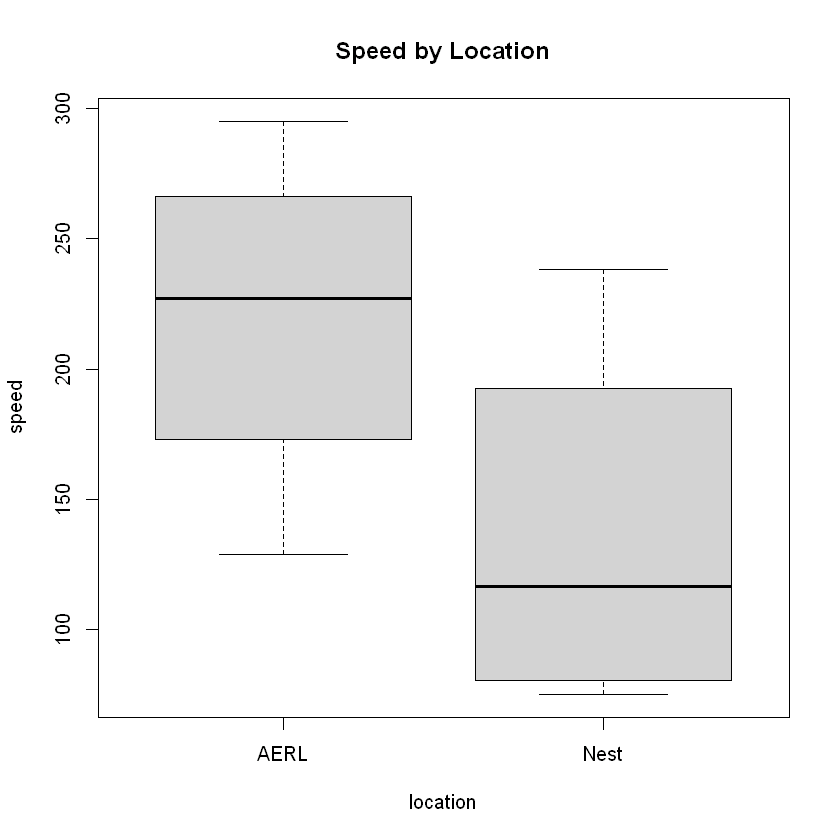

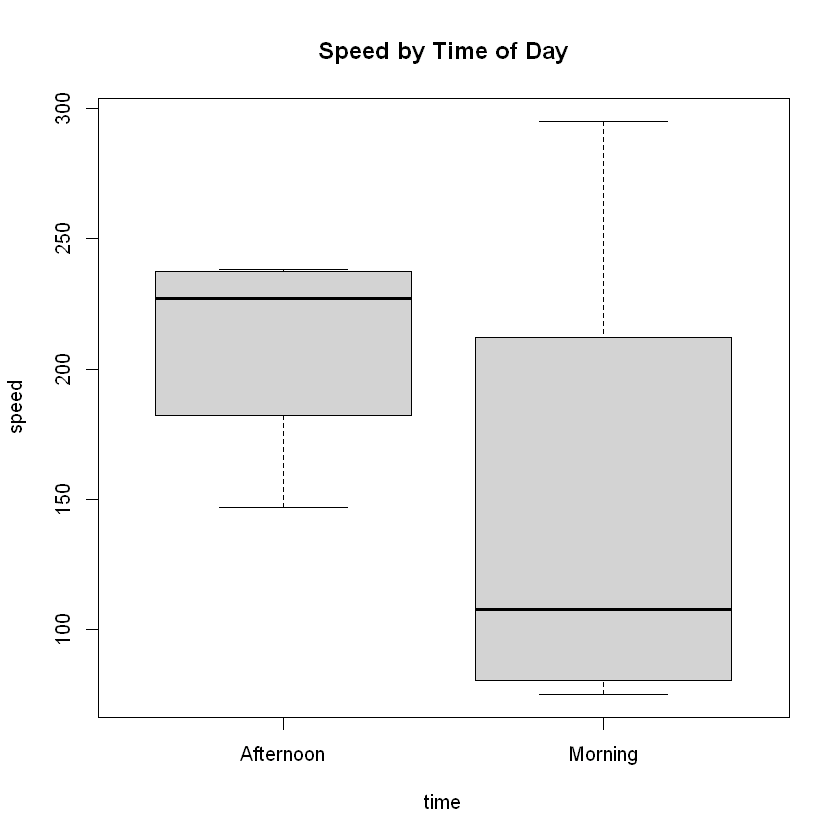

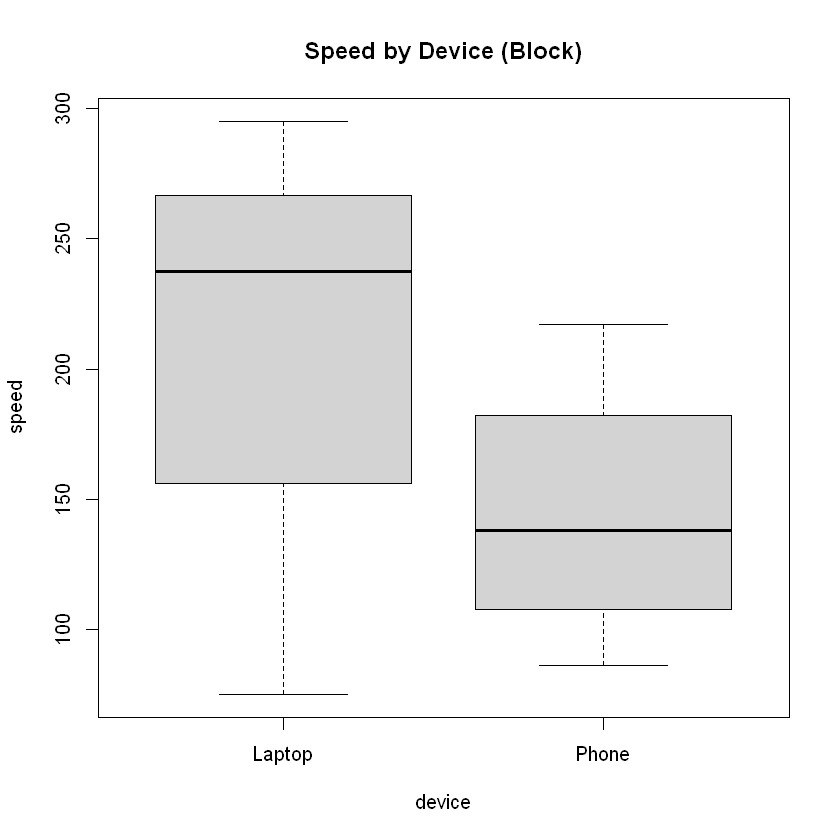

In [6]:
boxplot(speed ~ location, data = wifi,
        main="Speed by Location")

boxplot(speed ~ time, data = wifi,
        main="Speed by Time of Day")

boxplot(speed ~ device, data = wifi,
        main="Speed by Device (Block)")


- The boxplots show noticeable differences in wifi speed across treatment and block levels. Wi-Fi speed tends to be higher in the AERL building, in the afternoon, and when using a laptop. The time of day factor shows morning having the largest spread amongst all boxplots, while the afternoon measurements are more concentrated, suggesting more stable speeds later in the day.

- These patterns match intuitive expectations: AERL generally has lower student density than the AMS Nest, and laptops typically have stronger wifi receivers than phones. Besides, morning hours may have heavier network usage due to class start times and morning rush hours, while afternoons may be less congested since many students leave campus early.

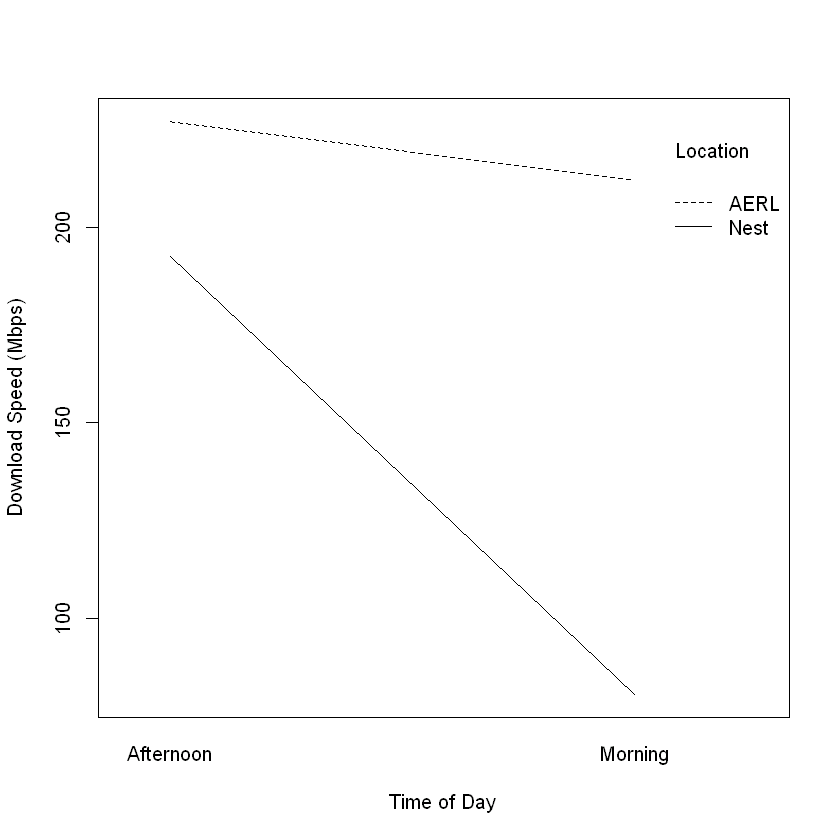

In [ ]:
interaction.plot(wifi$time, wifi$location, wifi$speed,
                 xlab="Time of Day", trace.label="Location",
                 ylab="Download Speed (Mbps)")


- When the location is Nest, we see that change in time of day from afternoon to morning significantly decreases the wifi speed. Location AERL also has a negative effect, but is much more slighter. This indicates that morning rush hours affects the Nest more severely than AERL

- Overall, we see that the speed pattern is consistent with the boxplots: AERL > Nest, and Afternoon > Morning.


In [2]:
full <- lm(speed ~ location * time + device, data = wifi)
summary(full)


Call:
lm(formula = speed ~ location * time + device, data = wifi)

Residuals:
     1      2      3      4      5      6      7      8 
-38.79  38.79  49.76 -49.76  12.26 -12.26 -23.24  23.24 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)   
(Intercept)                260.24      44.12   5.899  0.00973 **
locationNest               -34.50      55.80  -0.618  0.58018   
timeMorning                -15.00      55.80  -0.269  0.80551   
devicePhone                -66.47      39.46  -1.685  0.19065   
locationNest:timeMorning   -96.85      78.92  -1.227  0.30726   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.8 on 3 degrees of freedom
Multiple R-squared:  0.7909,	Adjusted R-squared:  0.512 
F-statistic: 2.836 on 4 and 3 DF,  p-value: 0.2091


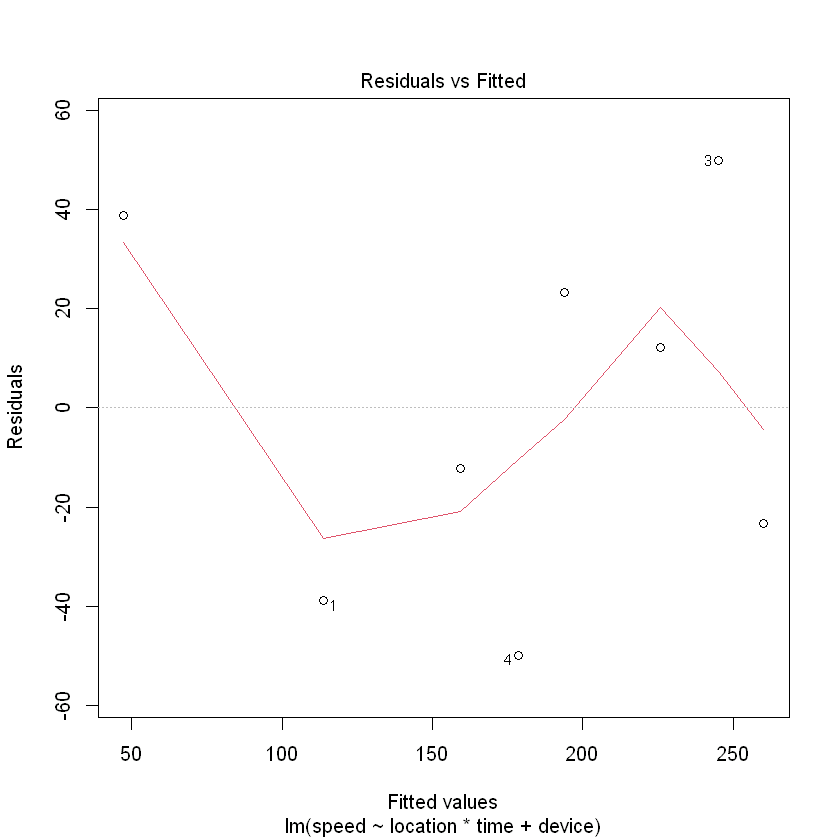

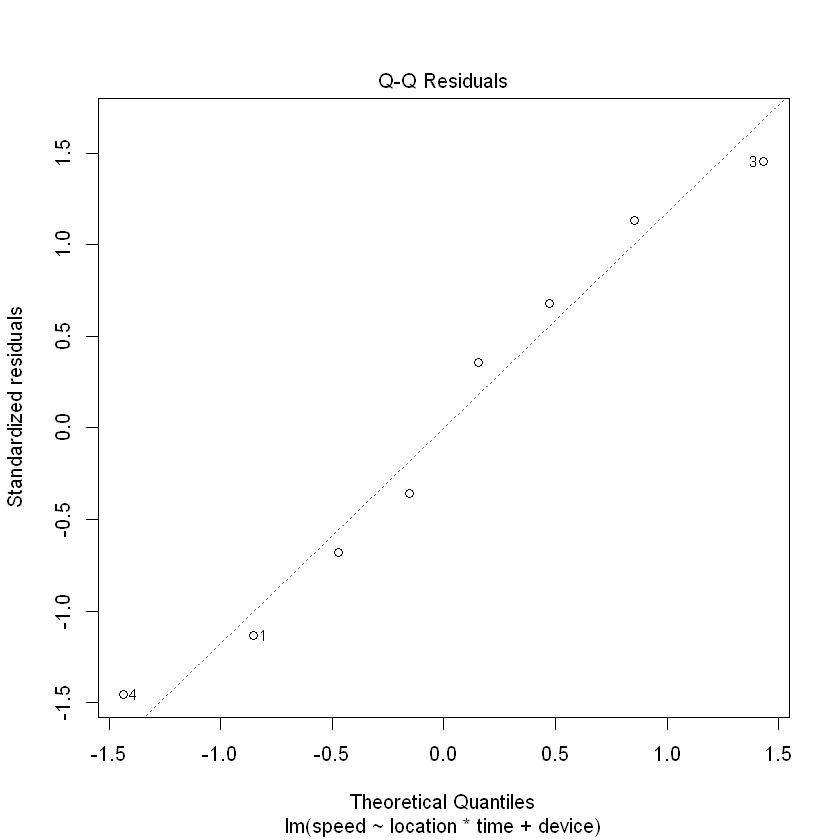

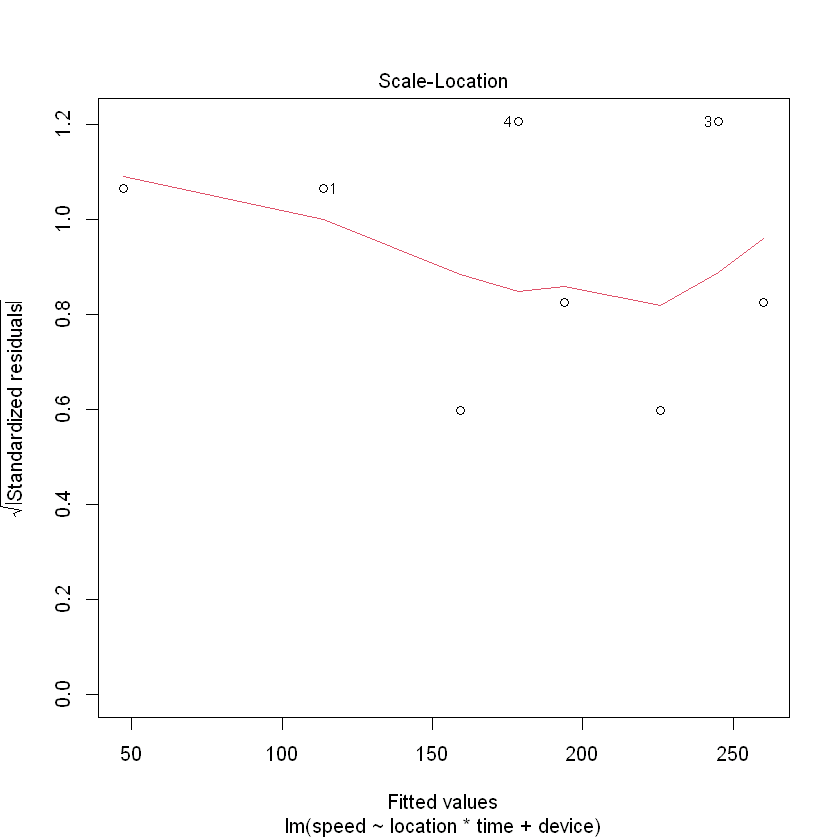

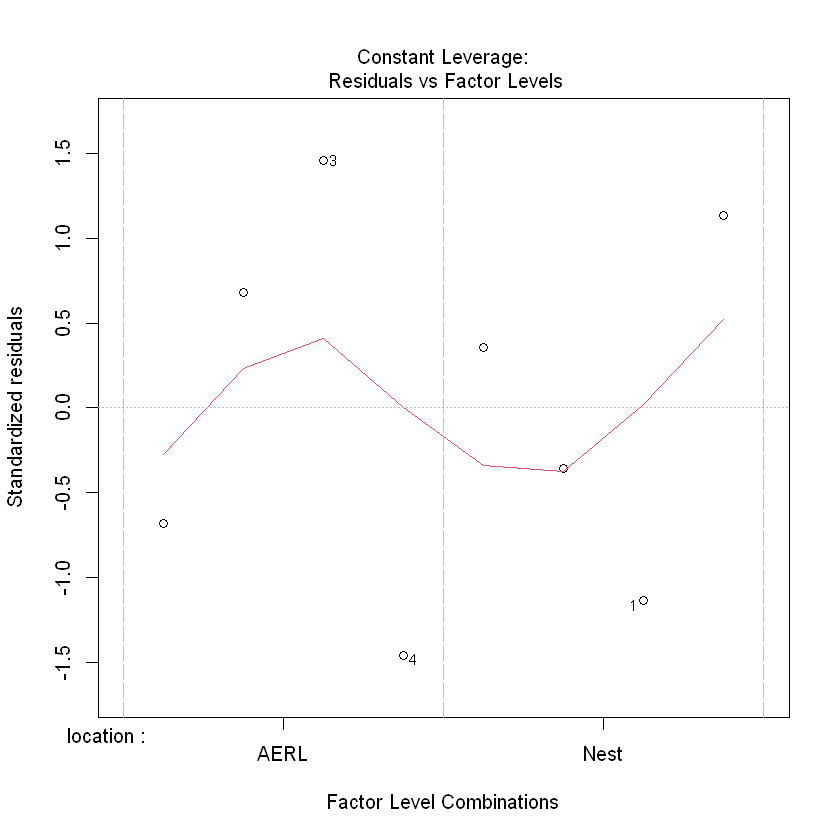

In [ ]:
plot(full)

- From the uncorrected original qq plot, we can say that our data is approximately normal. However, by looking at the residual vs fitted value plot, we see heteroskedasticity. Thus, we plan to apply a boxcox analysis